In [339]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [340]:
df = pd.read_csv('car_evaluation.csv', index_col=False)
df

,buying price,maintenance cost,number of doors,number of person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [341]:
df.drop_duplicates()

,buying price,maintenance cost,number of doors,number of person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


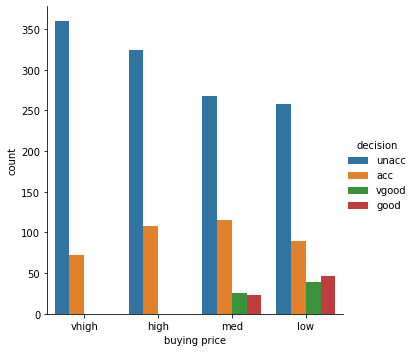

In [342]:
sns.catplot(kind='count', x='buying price', hue='decision', data=df)

In [343]:
df['number of doors'].replace(('5more'),('5'),inplace=True)
df['number of person'].replace(('more'),('5'),inplace=True)

In [344]:
df

,buying price,maintenance cost,number of doors,number of person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [345]:
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())
    

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5'] 	 4
['2' '4' '5'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [346]:
df.data = df[["maintenance cost","number of doors","number of person","lug_boot","safety"]]
df.target = df[["decision"]]


/var/folders/0r/m1xvx8c11c90xz17cp51blf00000gn/T/ipykernel_1190/2053161602.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.data = df[["maintenance cost","number of doors","number of person","lug_boot","safety"]]
/var/folders/0r/m1xvx8c11c90xz17cp51blf00000gn/T/ipykernel_1190/2053161602.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df[["decision"]]


In [347]:
df.data = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [348]:
df

,buying price,maintenance cost,number of doors,number of person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [349]:
df.data

,buying price_low,buying price_med,buying price_vhigh,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_3,number of doors_4,number of doors_5,number of person_4,number of person_5,lug_boot_med,lug_boot_small,safety_low,safety_med,decision_good,decision_unacc,decision_vgood
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for i in df.columns:
#     df[i]=le.fit_transform(df[i])

In [351]:
df.target.describe()

,decision
count,1728
unique,4
top,unacc
freq,1210


In [352]:
df

,buying price,maintenance cost,number of doors,number of person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [353]:
# fig=plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(),annot=True)


In [354]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV


In [355]:
model = LogisticRegression()
max_score=0.73
rs = 0

In [356]:
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=4)
y_test=y_test.values.ravel()
y_train = y_train.values.ravel()    
model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

In [357]:
def classifier(model, X_train_res, X_test, y_train_res, y_test):
    clf = model
    clf.fit( X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score, model

In [358]:
x_train

,buying price_low,buying price_med,buying price_vhigh,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_3,number of doors_4,number of doors_5,number of person_4,number of person_5,lug_boot_med,lug_boot_small,safety_low,safety_med,decision_good,decision_unacc,decision_vgood
1323,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
68,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
767,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
76,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0
509,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0
709,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
439,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
174,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0


In [359]:
y_train

array(['unacc', 'unacc', 'acc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [360]:
x_test

,buying price_low,buying price_med,buying price_vhigh,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_3,number of doors_4,number of doors_5,number of person_4,number of person_5,lug_boot_med,lug_boot_small,safety_low,safety_med,decision_good,decision_unacc,decision_vgood
577,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
961,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0
315,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0
230,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
1297,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0
209,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
675,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1673,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [362]:
y_test

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'good',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'vgood',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
     

In [363]:

# for i in range (1,1000):
#     max_score=0.74
#     x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=i)
#     y_test=y_test.values.ravel()
#     y_train = y_train.values.ravel()    
#     model.fit(x_train, y_train)
#     sc = model.score(x_test, y_test)
#     if sc>max_score:
#         print(sc,i)
#         rs=i

In [364]:
# rs

In [300]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [303]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [304]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=21, random_state=1)

In [305]:
score, rf = classifier(RandomForestClassifier(max_depth=3, n_estimators=21, random_state=1), x_train, x_test, y_train, y_test)
score

1.0

In [365]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 25)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

1.0
